# Edit Distance Between Memory and Rules

### T14

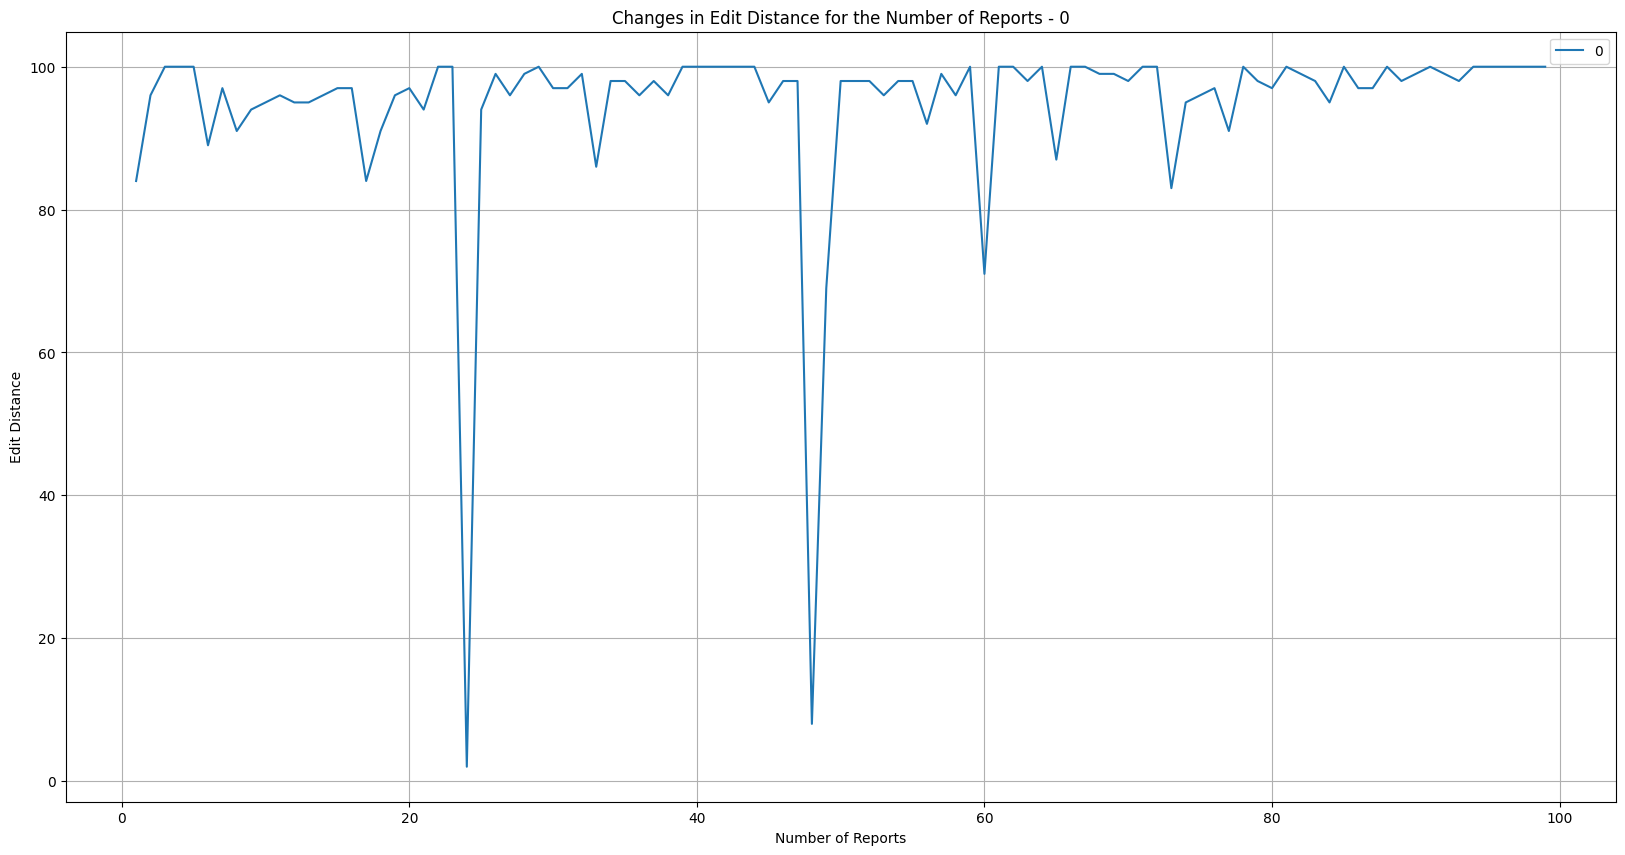

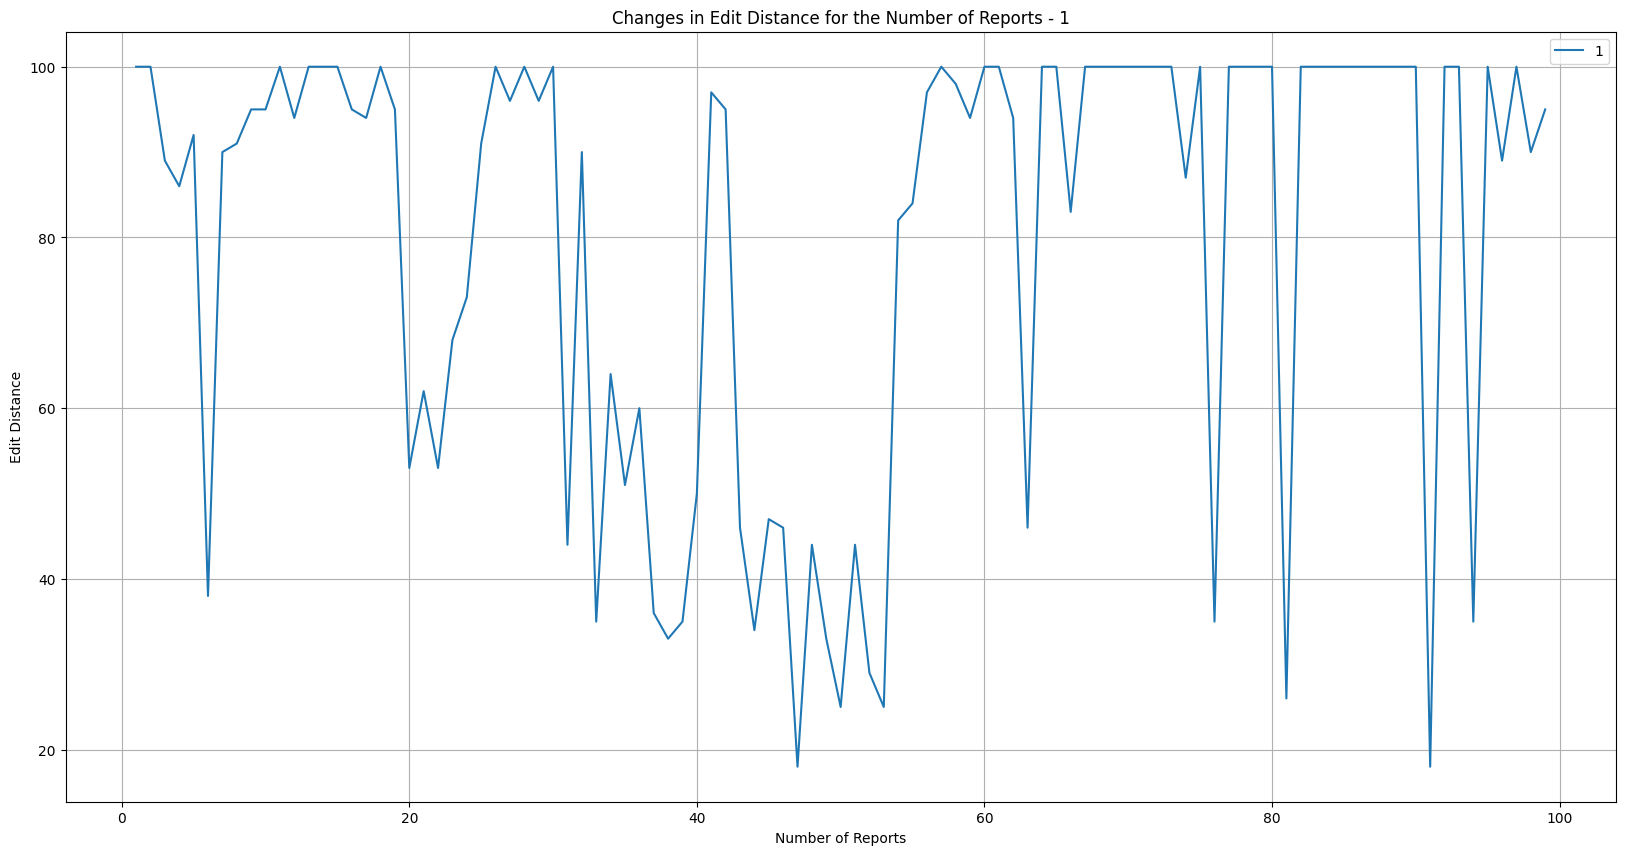

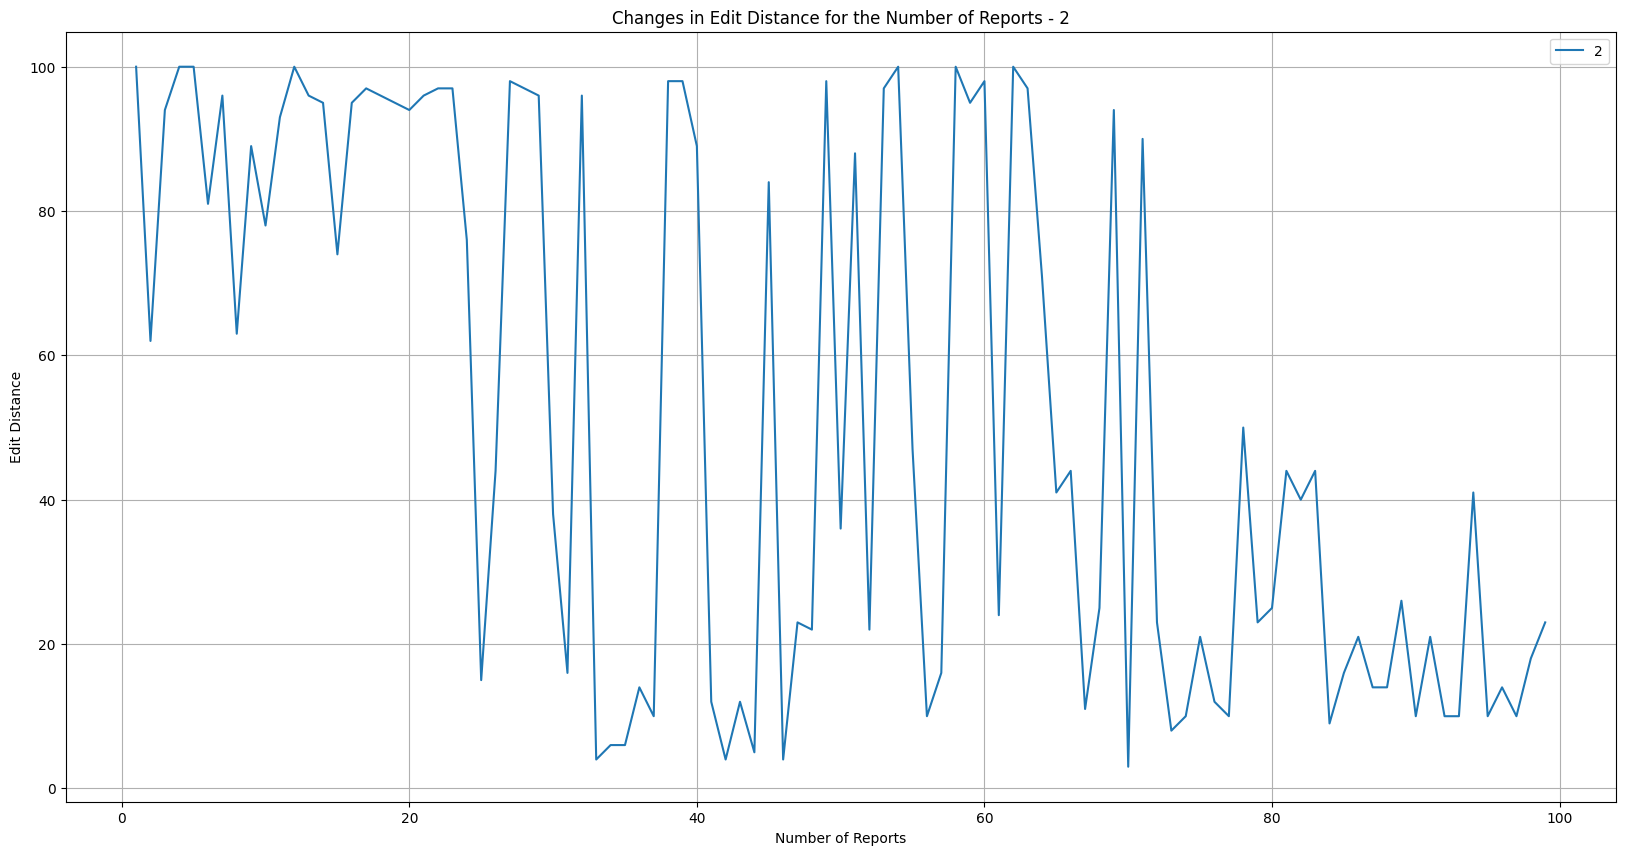

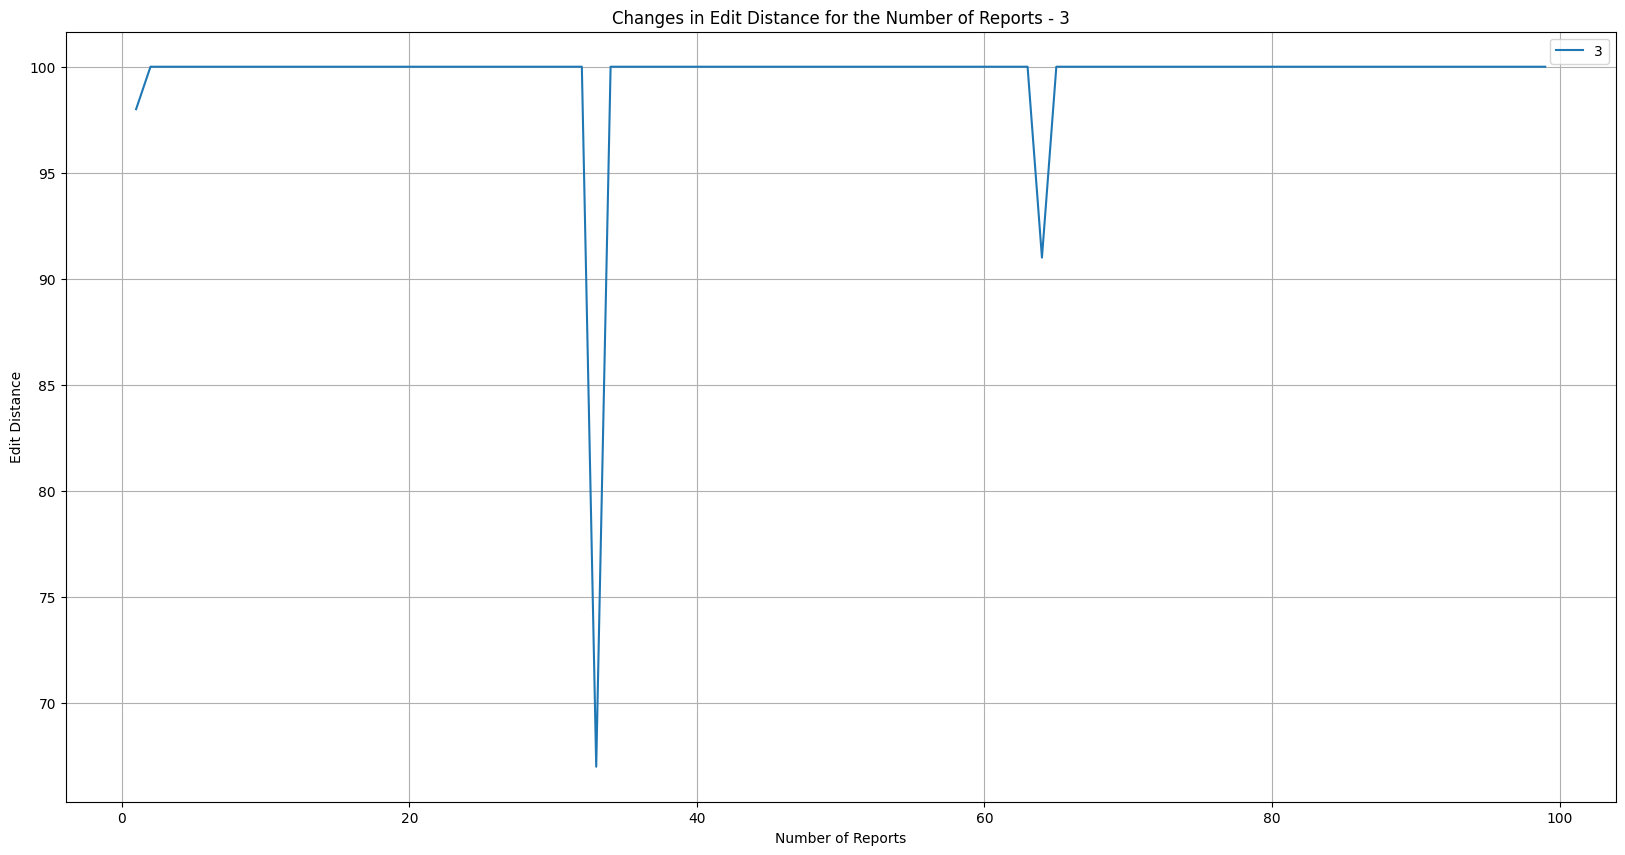

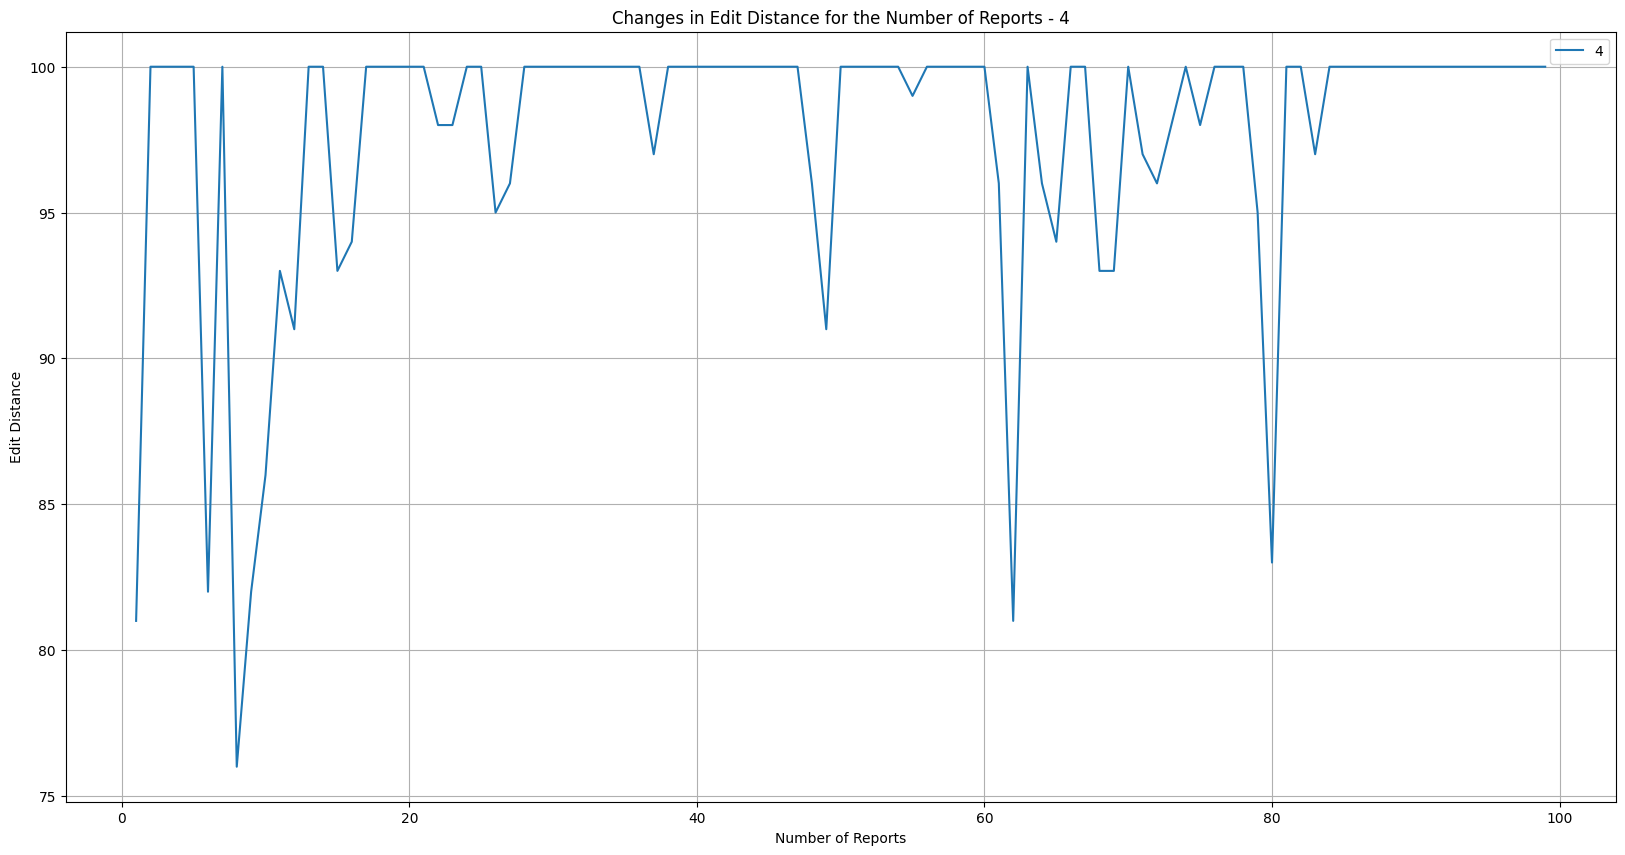

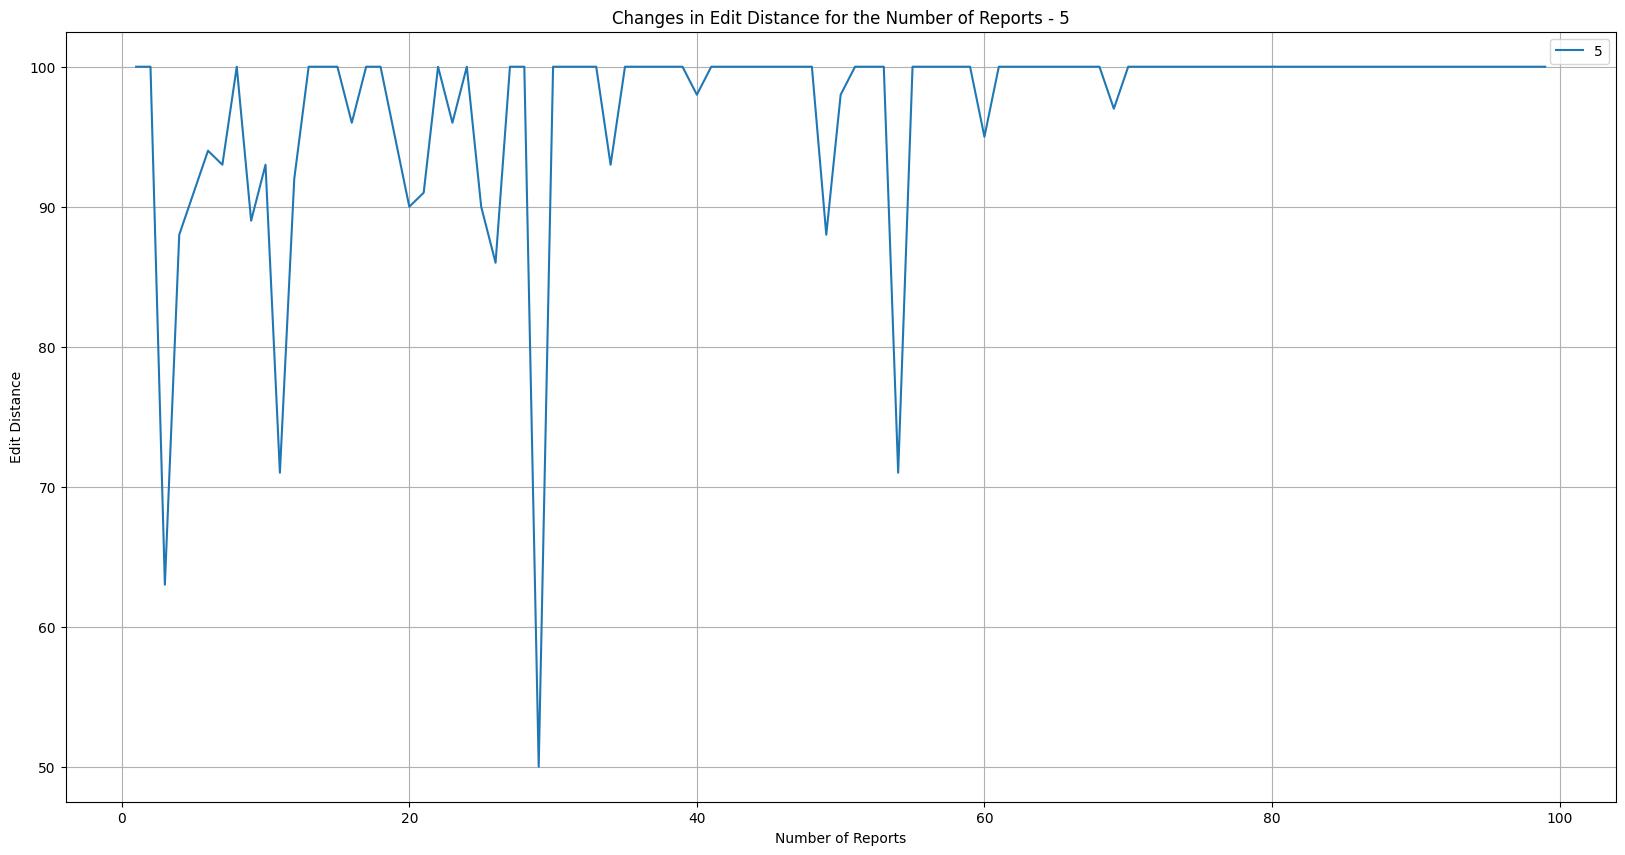

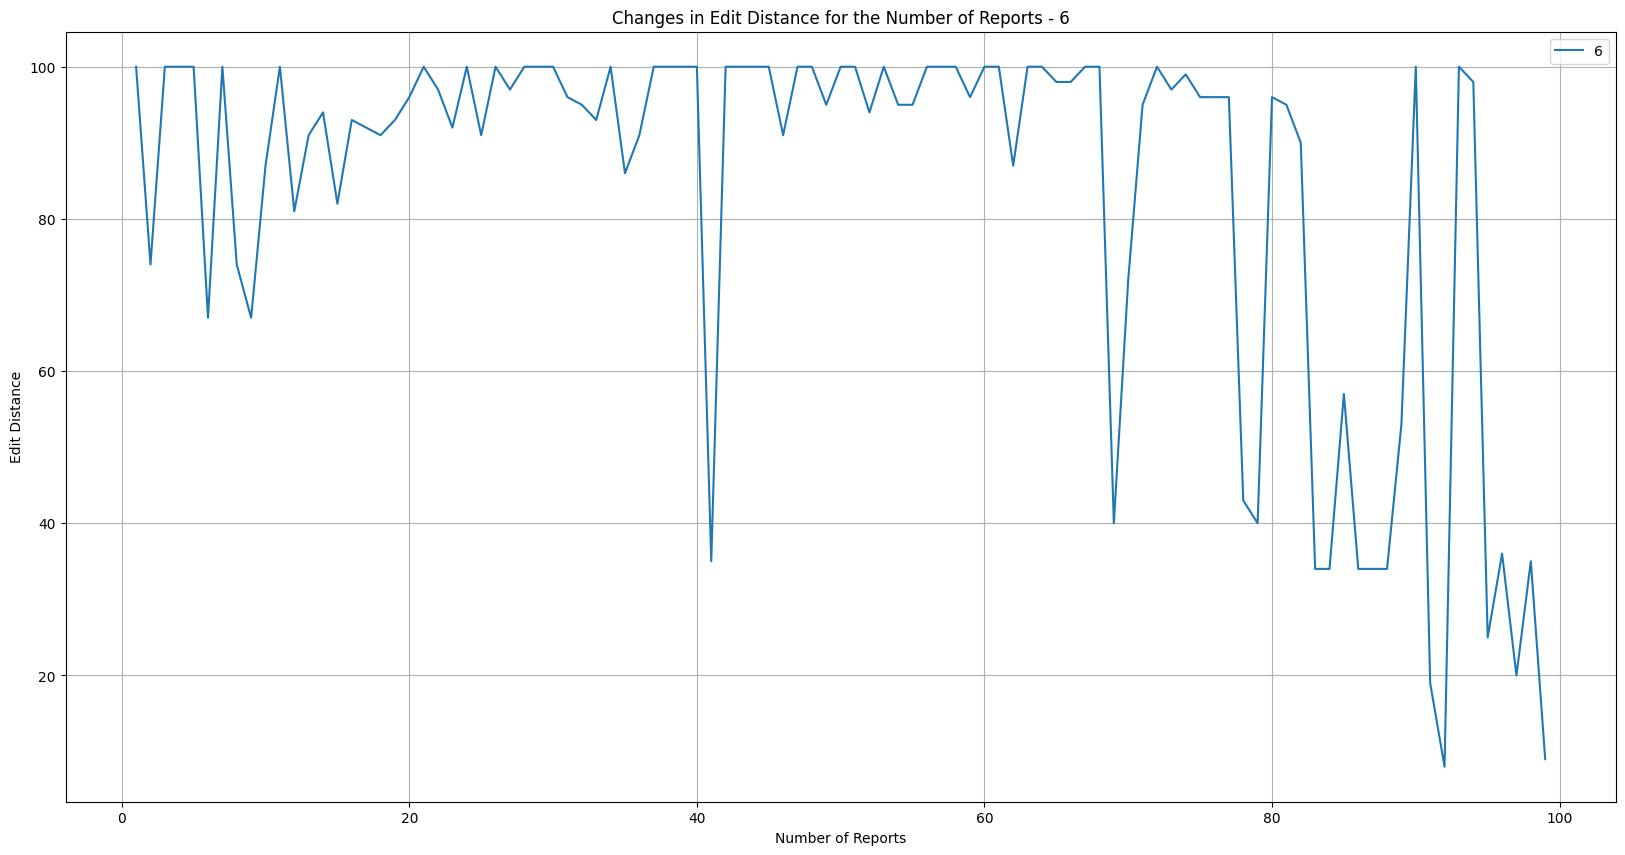

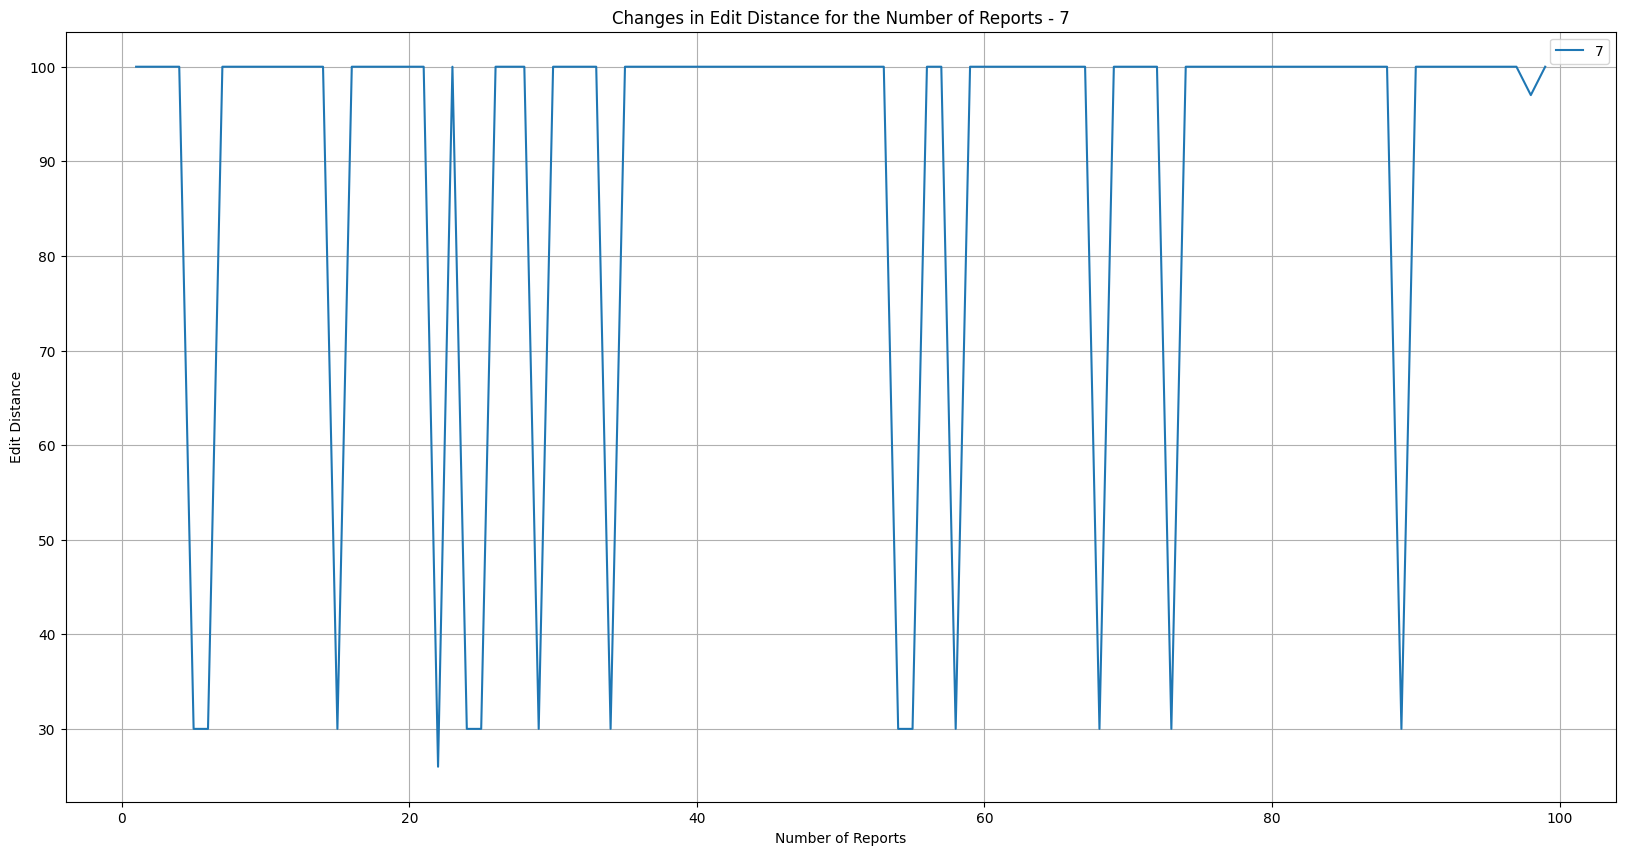

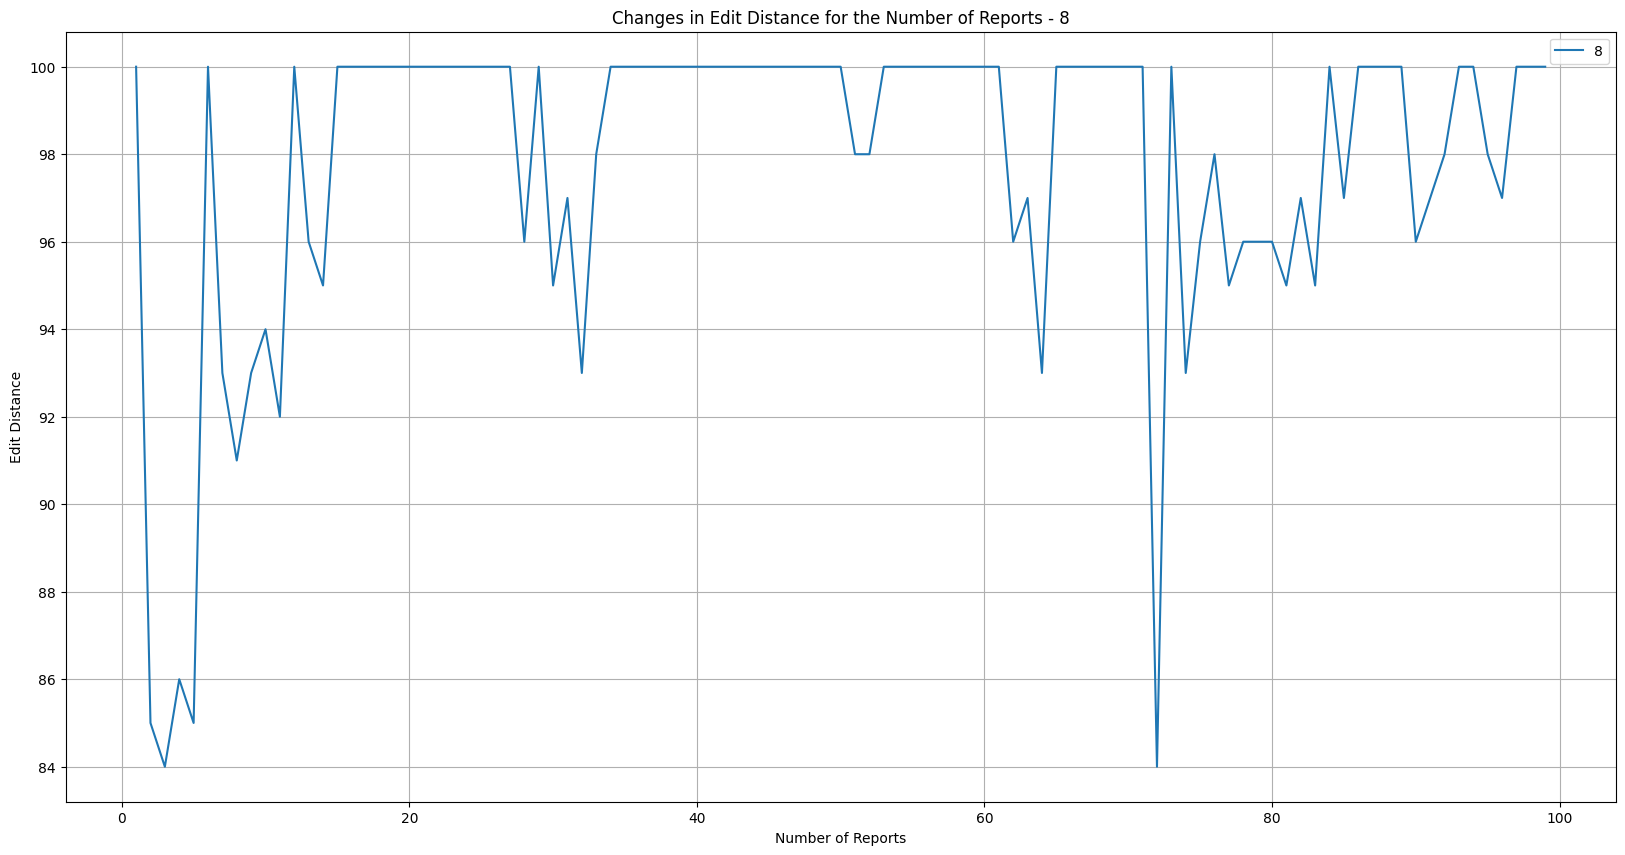

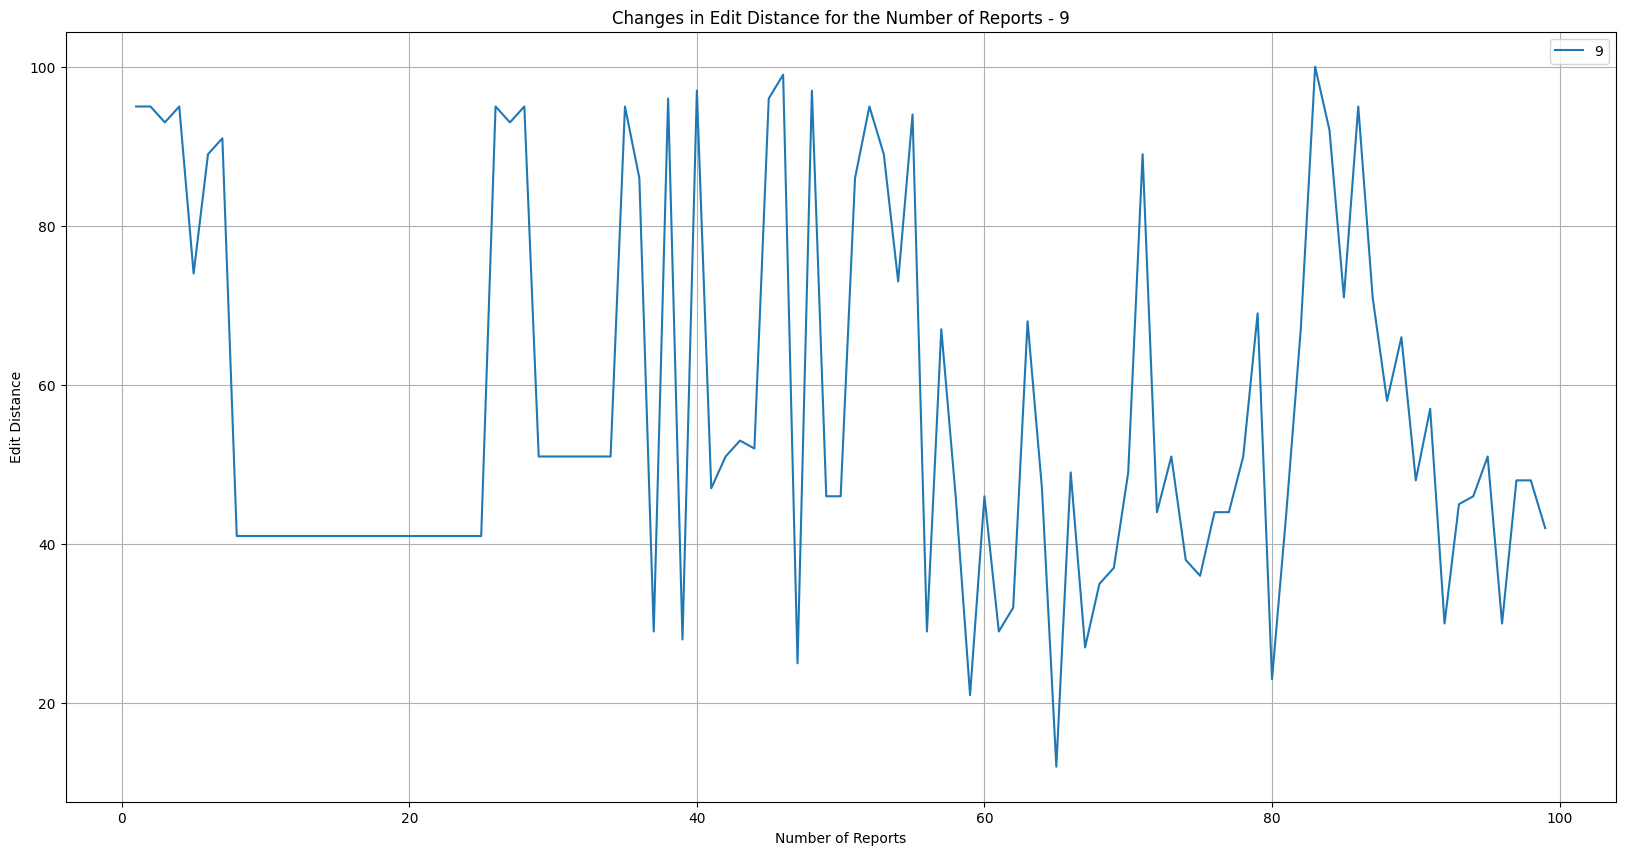

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

for idx in range(10):
    plt.figure(figsize=(20, 10))
    file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_{idx}.csv"
    data = pd.read_csv(file_path)
    data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])
    plt.plot(data.index, data['cmem_t_edit_distance'], label=idx)
    
    plt.xlabel('Number of Reports')
    plt.ylabel('Edit Distance')
    plt.title(f'Changes in Edit Distance for the Number of Reports - {idx}')
    plt.legend()
    plt.grid(True)
    plt.show()


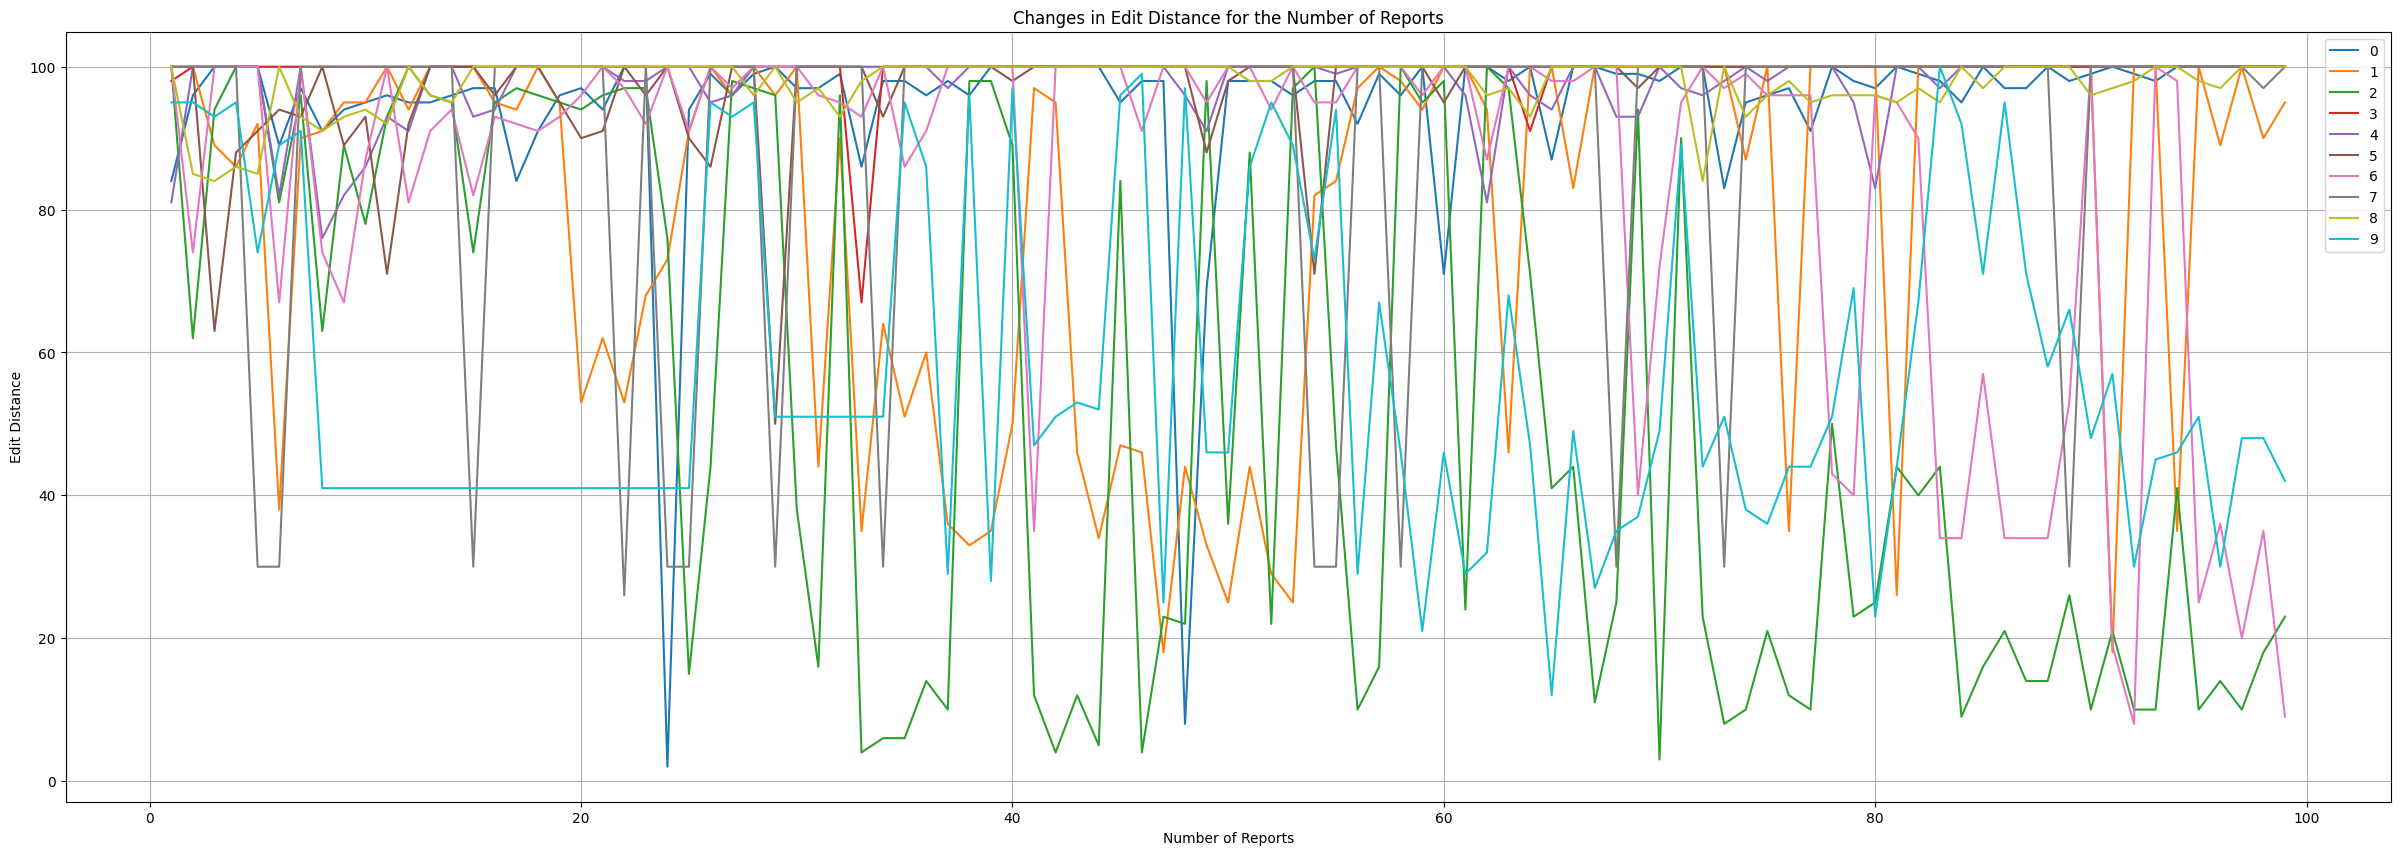

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(30, 10))

for idx in range(10):

    file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_{idx}.csv"
    data = pd.read_csv(file_path)
    data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])
    plt.plot(data.index, data['cmem_t_edit_distance'], label=idx)
    
plt.xlabel('Number of Reports')
plt.ylabel('Edit Distance')
plt.title('Changes in Edit Distance for the Number of Reports')
plt.legend()
plt.grid(True)

plt.savefig('combined_plot.png')
plt.show()


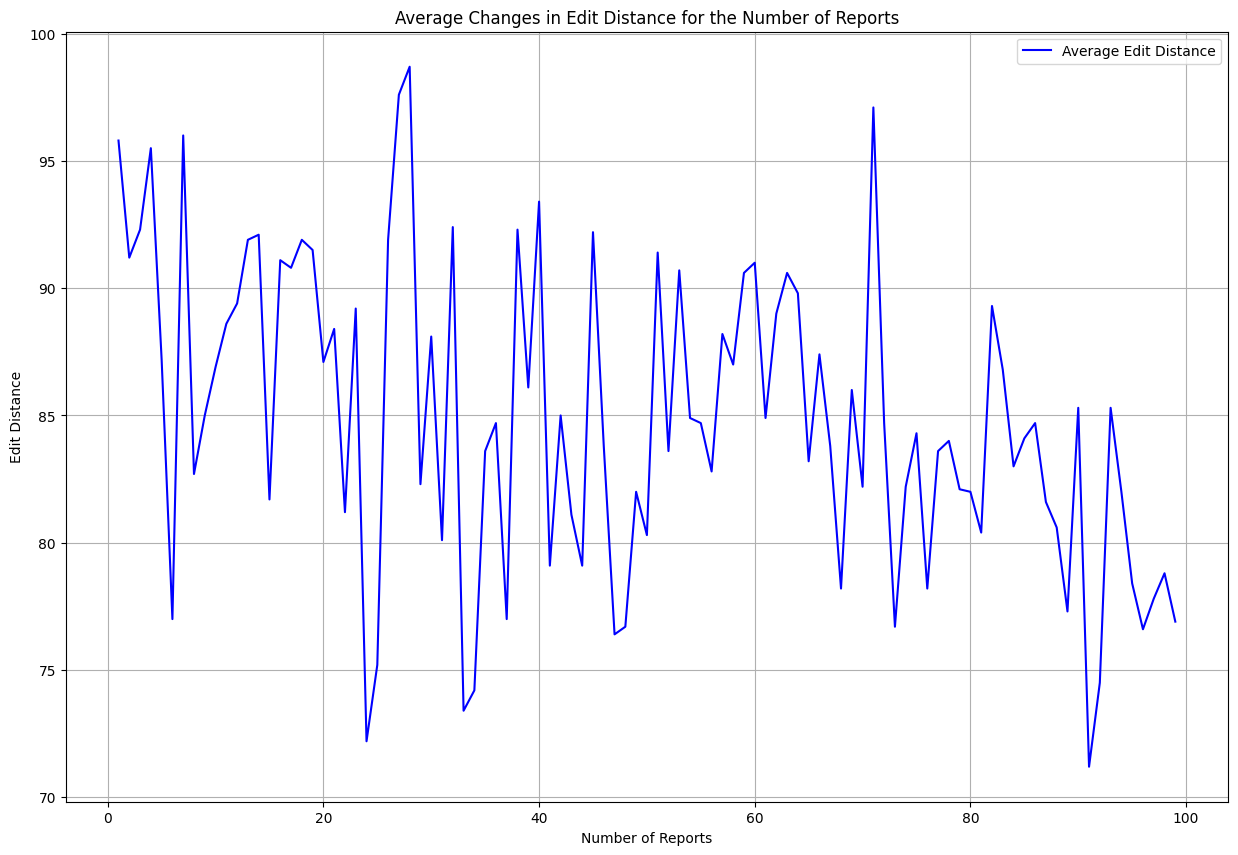

In [3]:
data_frames = []

for idx in range(10):
    file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_{idx}.csv"
    data = pd.read_csv(file_path)
    data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])
    data_frames.append(data['cmem_t_edit_distance'])

combined_data = pd.concat(data_frames, axis=1)
average_data = combined_data.mean(axis=1)

plt.figure(figsize=(15, 10))
plt.plot(average_data, label='Average Edit Distance', color='blue')

plt.xlabel('Number of Reports')
plt.ylabel('Edit Distance')
plt.title('Average Changes in Edit Distance for the Number of Reports')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('average_edit_distance_plot.png')
plt.show()

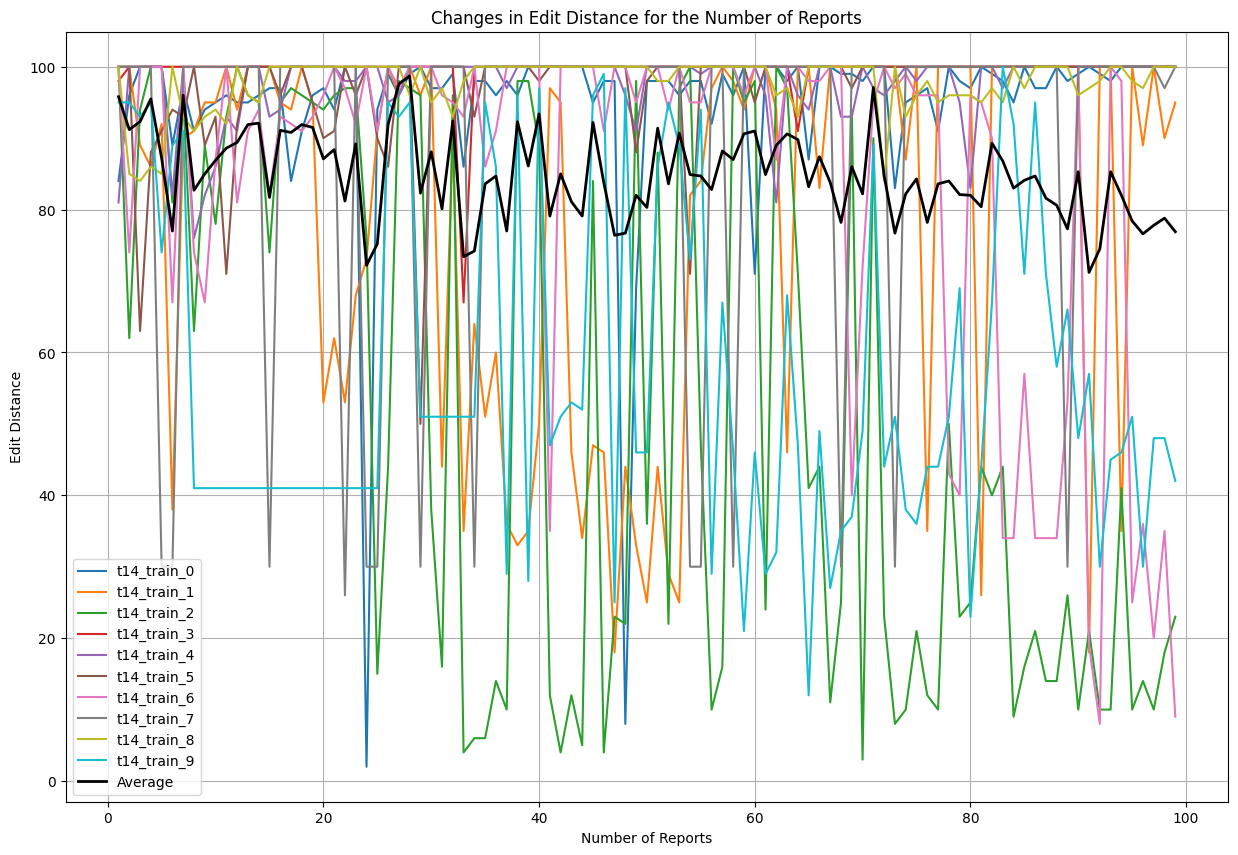

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Initialize an empty list to store all edit distance values for averaging
all_edit_distances = []

plt.figure(figsize=(15, 10))

for idx in range(10):
    file_path = f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_{idx}.csv"
    data = pd.read_csv(file_path)
    data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])
    
    # Append edit distance values to all_edit_distances
    all_edit_distances.append(data['cmem_t_edit_distance'].values)
    
    # Plot individual edit distance values
    plt.plot(data.index, data['cmem_t_edit_distance'], label=f't14_train_{idx}')

# Convert list of arrays to a DataFrame for easier manipulation
all_edit_distances_df = pd.DataFrame(all_edit_distances).T

# Calculate the average edit distance values
average_edit_distances = all_edit_distances_df.mean(axis=1)

# Plot the average edit distance values
plt.plot(data.index, average_edit_distances, label='Average', color='black', linewidth=2)

plt.xlabel('Number of Reports')
plt.ylabel('Edit Distance')
plt.title('Changes in Edit Distance for the Number of Reports')
plt.legend()
plt.grid(True)

plt.savefig('combined_plot.png')
plt.show()


# Test Performance

In [5]:
from metrics import *
import numpy as np
import pandas as pd

results = []
for idx in range(10):
    memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_test_{idx}.csv")
    print(f"t14_test_{idx}")
    result = t14_performance_report(memory_df, f"cmem_t_ans_str")
    results.append(result)
    print()

results = np.array(results)
ci_lower = np.percentile(results, 2.5, axis=0)
ci_upper = np.percentile(results, 97.5, axis=0)

print("Precision:", np.mean(results[:, 0]), "(CI:", ci_lower[0], ci_upper[0], ")")
print("Recall:", np.mean(results[:, 1]), "(CI:", ci_lower[1], ci_upper[1], ")")
print("F1:", np.mean(results[:, 2]), "(CI:", ci_lower[2], ci_upper[2], ")")

t14_test_0
              precision    recall  f1-score   support

          T1       0.96      0.64      0.77       169
          T2       0.80      0.99      0.88       406
          T3       0.98      0.70      0.82        92
          T4       0.90      0.58      0.70        33

    accuracy                           0.84       700
   macro avg       0.91      0.72      0.79       700
weighted avg       0.87      0.84      0.84       700


t14_test_1
              precision    recall  f1-score   support

          T1       0.89      0.91      0.90       158
          T2       0.93      0.93      0.93       419
          T3       0.80      0.86      0.83        94
          T4       0.85      0.59      0.69        29

    accuracy                           0.90       700
   macro avg       0.87      0.82      0.84       700
weighted avg       0.90      0.90      0.90       700


t14_test_2
              precision    recall  f1-score   support

          T1       0.84      0.93      0

In [6]:
results = []
for idx in range(10):
    memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_test_{idx}.csv")
    print(f"n03_test_{idx}")
    result = n03_performance_report(memory_df, f"cmem_n_ans_str")
    results.append(result)
    print()

results = np.array(results)
ci_lower = np.percentile(results, 2.5, axis=0)
ci_upper = np.percentile(results, 97.5, axis=0)

print("Precision:", np.mean(results[:, 0]), "(CI:", ci_lower[0], ci_upper[0], ")")
print("Recall:", np.mean(results[:, 1]), "(CI:", ci_lower[1], ci_upper[1], ")")
print("F1:", np.mean(results[:, 2]), "(CI:", ci_lower[2], ci_upper[2], ")")

n03_test_0
              precision    recall  f1-score   support

          N0       0.93      0.97      0.95       255
          N1       0.91      0.88      0.89       258
          N2       0.68      0.76      0.72        91
          N3       0.94      0.74      0.83        65

    accuracy                           0.88       669
   macro avg       0.87      0.84      0.85       669
weighted avg       0.89      0.88      0.89       669


n03_test_1
              precision    recall  f1-score   support

          N0       0.94      0.96      0.95       275
          N1       0.86      0.92      0.89       259
          N2       0.89      0.58      0.70        98
          N3       0.75      0.89      0.82        65

    accuracy                           0.89       697
   macro avg       0.86      0.84      0.84       697
weighted avg       0.89      0.89      0.88       697


n03_test_2
              precision    recall  f1-score   support

          N0       0.92      0.97      0

# significant drop in edit distance

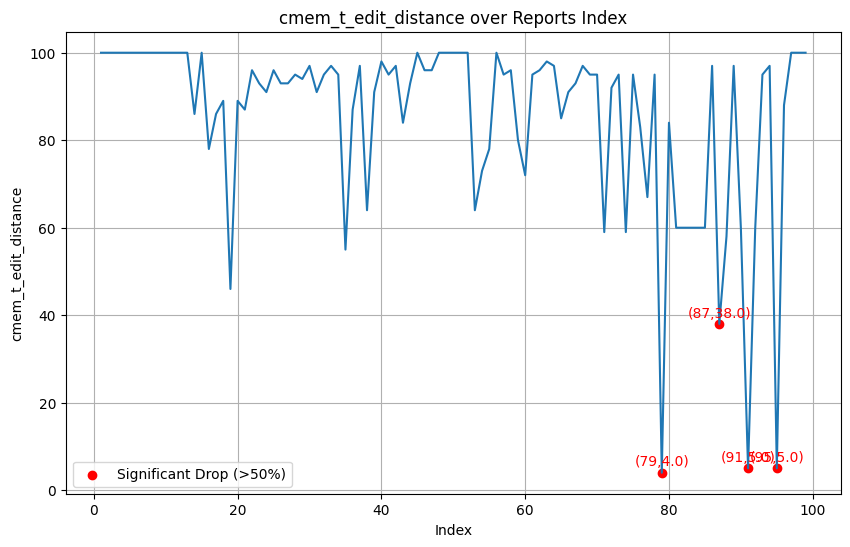

In [8]:
import matplotlib.pyplot as plt

file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_0.csv"
data = pd.read_csv(file_path).dropna(subset=['cmem_t_edit_distance'])

data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])

data['percentage_change'] = data['cmem_t_edit_distance'].pct_change() * 100

significant_drops = data[data['percentage_change'] <= -50]


plt.figure(figsize=(10, 6))
plt.plot(data.index, data['cmem_t_edit_distance'], linestyle='-')
plt.scatter(significant_drops.index, significant_drops['cmem_t_edit_distance'], marker='o', color='red', label='Significant Drop (>50%)')
for idx in significant_drops.index:
    plt.annotate(f"({idx},{data.loc[idx, 'cmem_t_edit_distance']})", (idx, data.loc[idx, 'cmem_t_edit_distance']),
                 textcoords="offset points", xytext=(0,5), ha='center', color='red')

plt.title('cmem_t_edit_distance over Reports Index')
plt.xlabel('Index')
plt.ylabel('cmem_t_edit_distance')
plt.legend()
plt.grid(True)
plt.show()

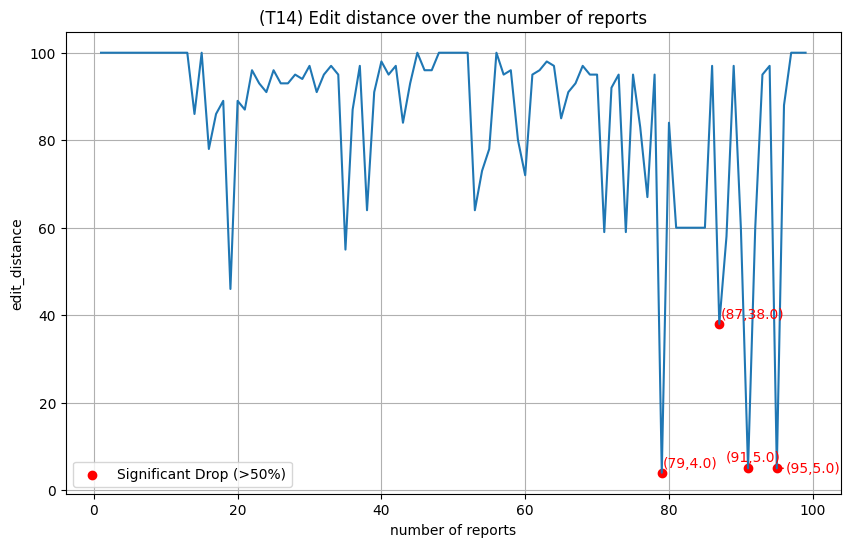

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

file_path = "/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_0.csv"
data = pd.read_csv(file_path).dropna(subset=['cmem_t_edit_distance'])

data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])

data['percentage_change'] = data['cmem_t_edit_distance'].pct_change() * 100

significant_drops = data[data['percentage_change'] <= -50]

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['cmem_t_edit_distance'], linestyle='-')
plt.scatter(significant_drops.index, significant_drops['cmem_t_edit_distance'], marker='o', color='red', label='Significant Drop (>50%)')

texts = []
for idx in significant_drops.index:
    texts.append(plt.text(idx, data.loc[idx, 'cmem_t_edit_distance'], f"({idx},{data.loc[idx, 'cmem_t_edit_distance']})", color='red'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('(T14) Edit distance over the number of reports')
plt.xlabel('number of reports')
plt.ylabel('edit_distance')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_0.csv")
significant_drops_df = memory_df.iloc[significant_drops.index]
significant_drops_df

Unnamed: 0                                   patient_filename  t  \
79         453  TCGA-A1-A0SD.DD89D265-9E20-49C2-93BD-666BE7D5E41B  1   
87         595  TCGA-A7-A4SA.2649764C-9566-49DB-B8E9-B4B86DBB763C  1   
91         997  TCGA-BH-A0DG.46B16DD0-68E6-4A7A-919B-758219D1E85C  1   
95         801  TCGA-AO-A0JF.D58E5D64-B5B9-4487-8E46-225AE3617C14  0   

                                                 text  type  n  \
79  Final Pathologic Diagnosis: A. Sentinel lymph ...  BRCA  0   
87  Final Surgical Pathology Report. Procedure: Di...  BRCA  1   
91  P.4/33. ROIAGNOSIS: LYMPH NODE, RIGHT AXILLARY...  BRCA  0   
95  Clinical Diagnosis & History: 1.2. cm invasive...  BRCA  1   

    cmem_t_is_parsed                                   cmem_t_reasoning  \
79              True  The report indicates that the invasive tumor s...   
87              True  The report indicates that the size of the larg...   
91              True  Based on the report, the largest focus of the ...   
95              True  The report indicates that the size of the inva...   

                                     cmem_t_rules_str cmem_t_ans_str  \
79  T stage is determined based on the size of the...             T2   
87  T stage is determined based on the size of the...             T2   
91  T stage is determined based on the size of the...             T2   
95  T stage is determined based on the size of the...             T2   

                                    cmem_t_memory_str  cmem_t_memory_len  \
79  T1: Tumor size is 2 cm or less\nT2: Tumor size...               17.0   
87  T1: Tumor size is 2 cm or less\nT2: Tumor size...               14.0   
91  T1: Tumor size is 2 cm or less\nT2: Tumor size...               13.0   
95  T1: Tumor size is 2 cm or less\nT2: Tumor size...               15.0   

    cmem_t_memory_str_len  cmem_t_edit_distance cmem_t_is_updated  
79                 1844.0                   4.0             False  
87                 1409.0                  38.0             False  
91                 1331.0                   5.0             False  
95                 1571.0                   5.0             False

In [14]:
memory_df['text'].apply(len).mean()

3460.43

In [15]:
significant_drops_df['text'].apply(len)

79    12250
87     3578
91     2894
95     9741
Name: text, dtype: int64

In [16]:
memory_df['cmem_t_rules_str'].apply(len).mean()

996.43

In [17]:
significant_drops_df['cmem_t_rules_str'].apply(len)

79    1141
87     957
91     669
95    1141
Name: cmem_t_rules_str, dtype: int64

# Dynamic memory test (To decide the number of reports needed for memory)

### T14

In [ ]:
from src.metrics import *
import numpy as np
import pandas as pd

memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_dynamic_test_0.csv")
memory_df = memory_df.drop(['Unnamed: 0', 'patient_filename', 'text', 'type', 'n'], axis=1)

# x-axis
train_file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_0.csv"
train_data = pd.read_csv(train_file_path)
memory_idx = []
for idx, row in train_data.iterrows():
    if row["cmem_t_is_updated"] == True:
        memory_idx.append(idx)

# Check for parsing error: OK
for i in memory_idx:
    if len(memory_df[memory_df[f"cmem_t_{i}reports_is_parsed"]==False]) > 0:
        print(f"parsing error at memory {i}")

# gather y-axis data
precision_lst = []
recall_lst = []
f1_lst = []
for i in memory_idx:
    precision, recall, f1 = t14_performance_report(memory_df, f'cmem_t_{i}reports_ans_str')
    precision_lst.append(precision)
    recall_lst.append(recall)
    f1_lst.append(f1)

In [ ]:
memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_dynamic_test_0.csv")

zs_df = pd.read_csv("/secure/shared_data/rag_tnm_results/t14_results/mixtral_all_brca_luad_zs_results.csv")
fs_df = pd.read_csv("/secure/shared_data/rag_tnm_results/t14_results/mixtral_all_brca_luad_fs_results.csv")
zscot_df = pd.read_csv("/secure/shared_data/rag_tnm_results/t14_results/mixtral_all_brca_zscot_results.csv")
                       
filtered_zs_df = zs_df[zs_df["patient_filename"].isin(memory_df['patient_filename'])]
filtered_fs_df = fs_df[fs_df["patient_filename"].isin(memory_df['patient_filename'])]
filtered_zscot_df = zscot_df[zscot_df["patient_filename"].isin(memory_df['patient_filename'])]

zs_precision, zs_recall, zs_f1 = t14_performance_report(filtered_zs_df, 'ans_str')
fs_precision, fs_recall, fs_f1 = t14_performance_report(filtered_fs_df, 'ans_str')
zscot_precision, zscot_recall, zscot_f1 = t14_performance_report(filtered_zscot_df, 'ans_str_0')

In [ ]:
zs_precision, zs_recall, zs_f1 = t14_performance_report(filtered_zs_df, 'ans_str')
zs_precision, zs_recall, zs_f1

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.plot(memory_idx, precision_lst, label='Memory Precision', color='blue', marker='o')
plt.plot(memory_idx, recall_lst, label='Memory Recall', color='green', marker='o')
plt.plot(memory_idx, f1_lst, label='Memory F1 Score', color='red', marker='o')

plt.axhline(y=zs_precision, color='blue', linestyle='--', label='Zero-shot Precision')
plt.axhline(y=zs_recall, color='green', linestyle='--', label='Zero-shot Recall')
plt.axhline(y=zs_f1, color='red', linestyle='--', label='Zero-shot F1 Score')

for i in range(len(memory_idx)):
    if (precision_lst[i] < zs_precision) and (recall_lst[i] < zs_recall):
        plt.annotate(f'{memory_idx[i]}', 
                     (memory_idx[i], f1_lst[i]), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center', 
                     fontsize=10, 
                     color='red')

plt.xlabel('# of Reports for Memory (t14_train_0.csv)')
plt.ylabel('Scores')
plt.title('Testing Results on 700 test Reports (t14_test_0.csv)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
bad_memory_idx = []
for i in range(len(memory_idx)):
    if precision_lst[i] < zs_precision and recall_lst[i] < zs_recall:
        bad_memory_idx.append(memory_idx[i])   

len(bad_memory_idx)

In [ ]:
for idx in bad_memory_idx:
    print(train_data.iloc[idx]["cmem_t_memory_str"])
    print("---------")
    

### n03

In [ ]:
from src.metrics import *
import numpy as np
import pandas as pd

memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/n03_dynamic_test_0.csv")

# x-axis
train_file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_train_0.csv"
train_data = pd.read_csv(train_file_path)
memory_idx = []
for idx, row in train_data.iterrows():
    if row["cmem_n_is_updated"] == True:
        memory_idx.append(idx)

# Check for parsing error: OK
for i in memory_idx:
    if len(memory_df[memory_df[f"cmem_n_{i}reports_is_parsed"]==False]) > 0:
        print(f"parsing error at memory {i}")

# gather y-axis data
precision_lst = []
recall_lst = []
f1_lst = []
for i in memory_idx:
    precision, recall, f1 = n03_performance_report(memory_df, f'cmem_n_{i}reports_ans_str')
    precision_lst.append(precision)
    recall_lst.append(recall)
    f1_lst.append(f1)

In [ ]:
zs_df = pd.read_csv("/secure/shared_data/rag_tnm_results/n03_results/mixtral_all_brca_zs_results.csv")
filtered_zs_df = zs_df[zs_df["patient_filename"].isin(memory_df['patient_filename'])]
zs_precision, zs_recall, zs_f1 = n03_performance_report(filtered_zs_df, 'ans_str')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.plot(memory_idx, precision_lst, label='Memory Precision', color='blue', marker='o')
plt.plot(memory_idx, recall_lst, label='Memory Recall', color='green', marker='o')
plt.plot(memory_idx, f1_lst, label='Memory F1 Score', color='red', marker='o')

plt.axhline(y=zs_precision, color='blue', linestyle='--', label='Zero-shot Precision')
plt.axhline(y=zs_recall, color='green', linestyle='--', label='Zero-shot Recall')
plt.axhline(y=zs_f1, color='red', linestyle='--', label='Zero-shot F1 Score')

for i in range(len(memory_idx)):
    if (precision_lst[i] < zs_precision) and (recall_lst[i] < zs_recall):
        plt.annotate(f'{memory_idx[i]}', 
                     (memory_idx[i], f1_lst[i]), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center', 
                     fontsize=10, 
                     color='red')

plt.xlabel('# of Reports for Memory (n03_train_0.csv)')
plt.ylabel('Scores')
plt.title('Testing Results on 700 test Reports (n03_test_0.csv)')
plt.legend()
plt.grid(True)

plt.show()

# Edit Distance Between (current)Rules and (previous)Rules

/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


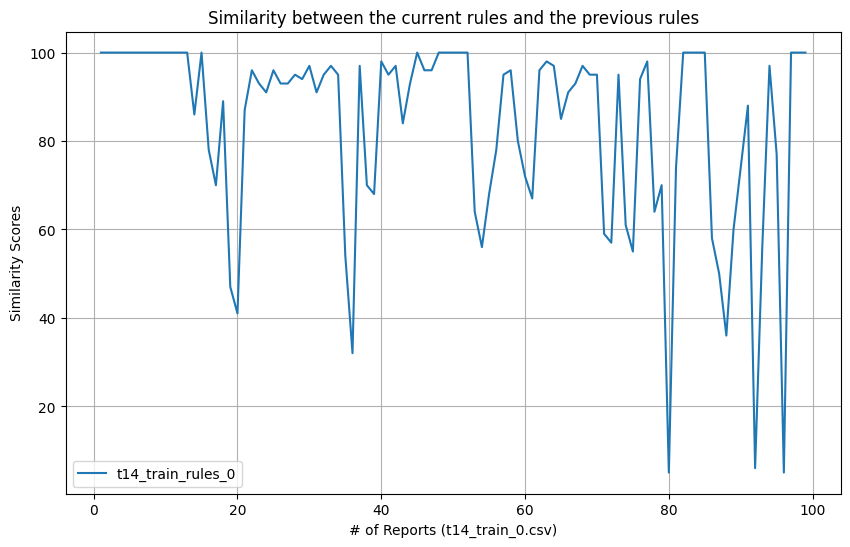

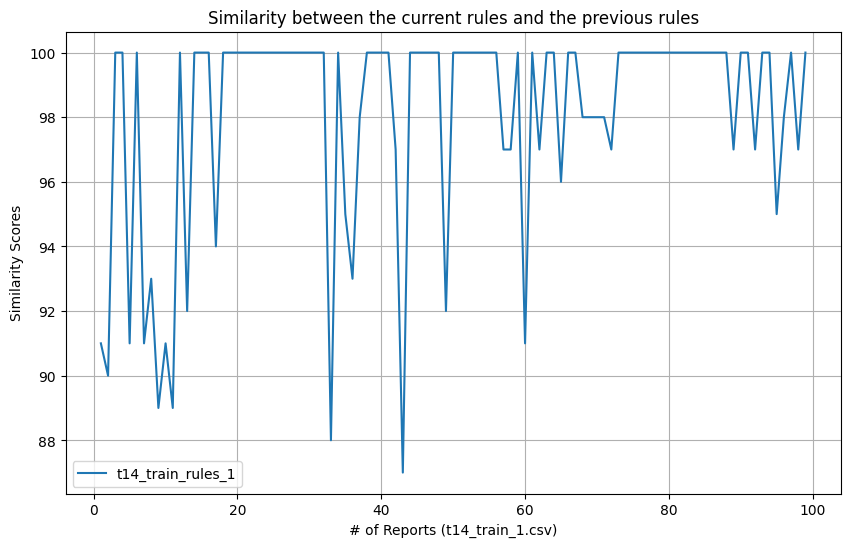

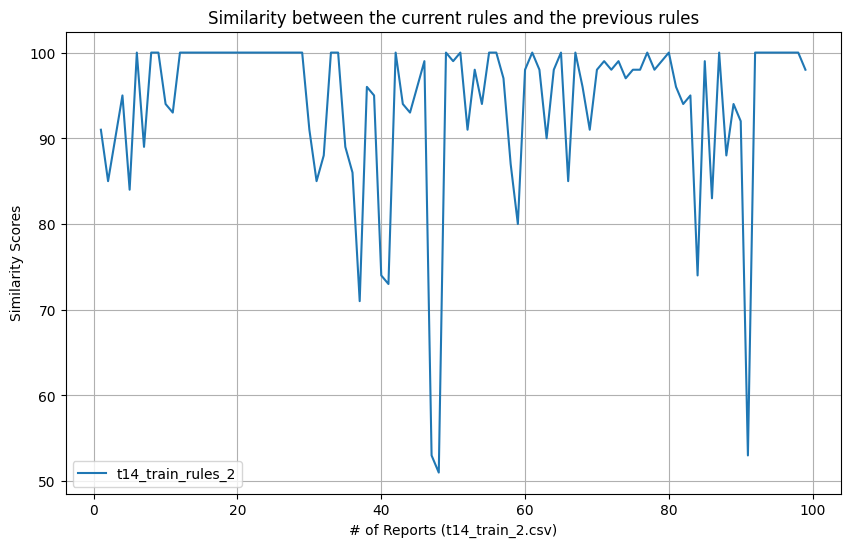

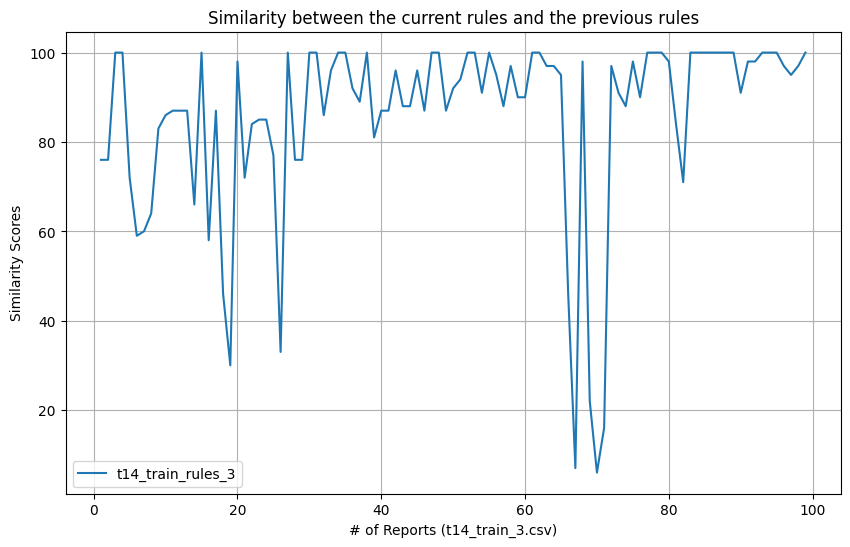

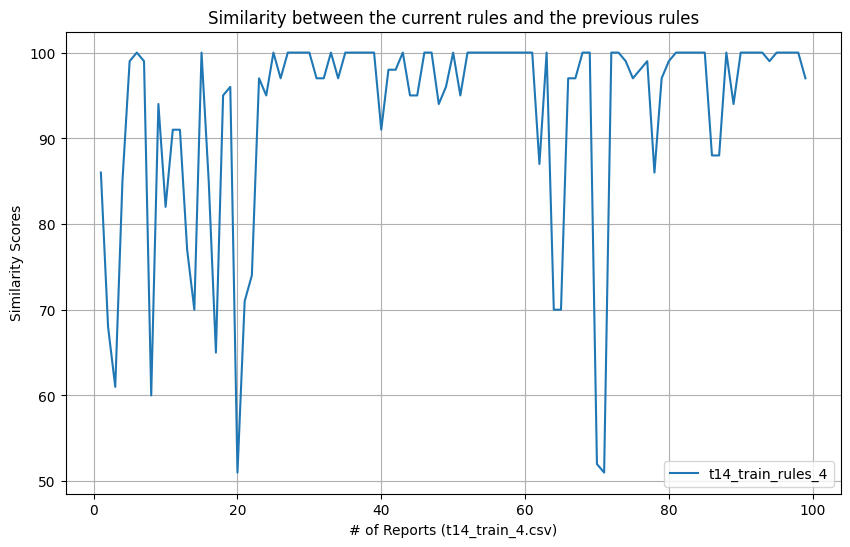

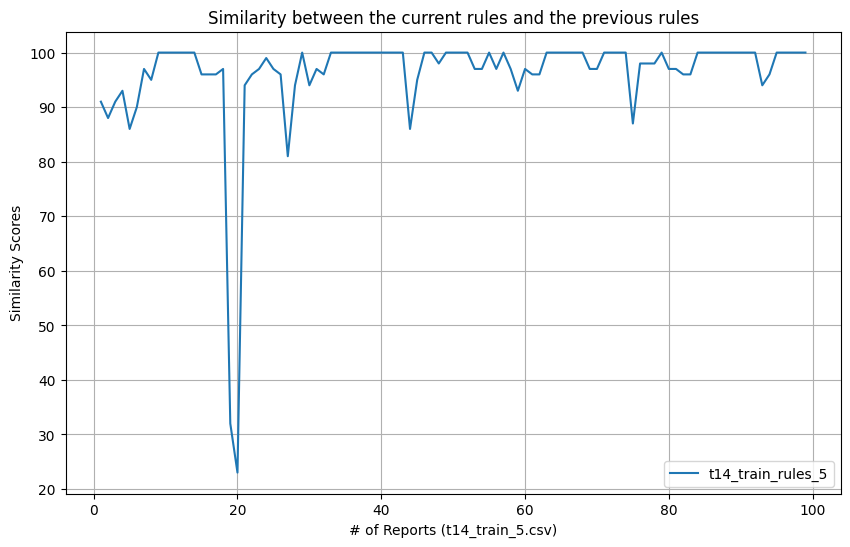

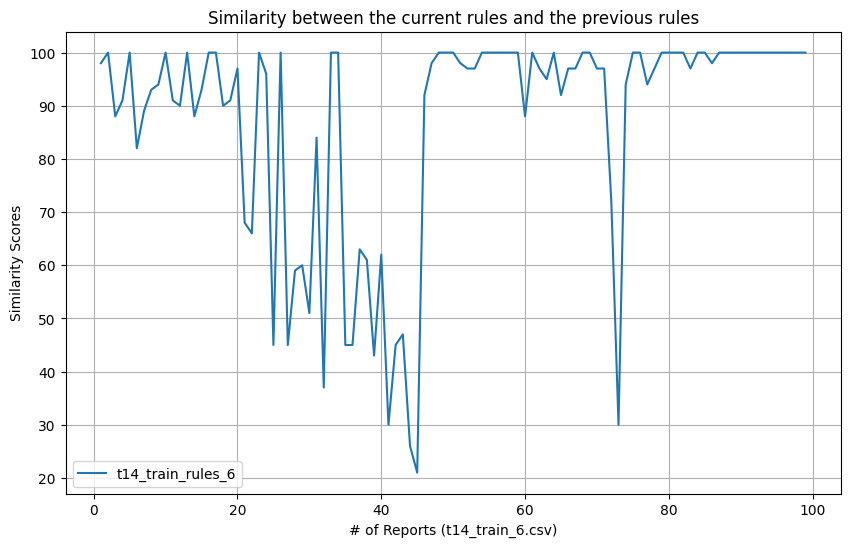

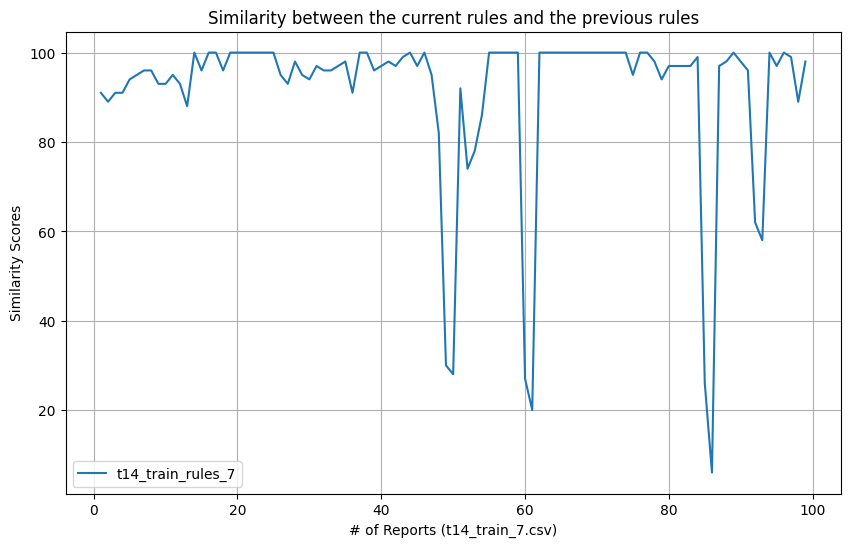

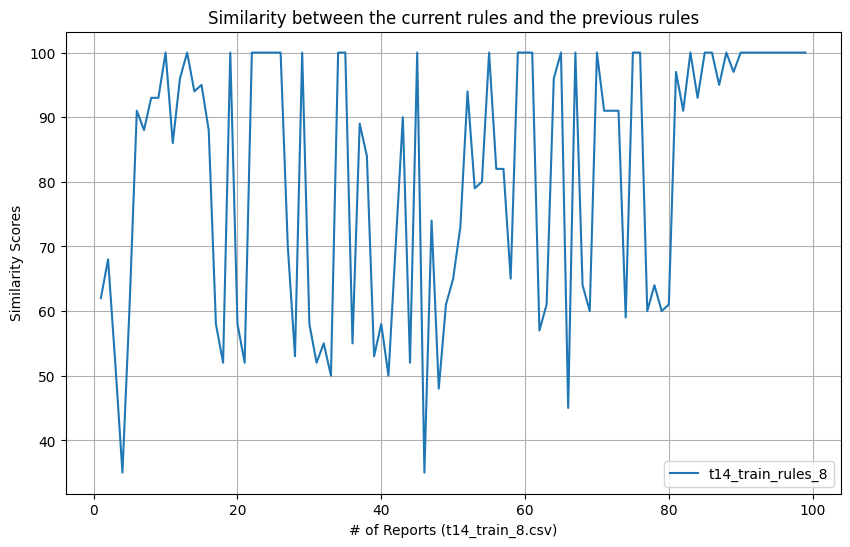

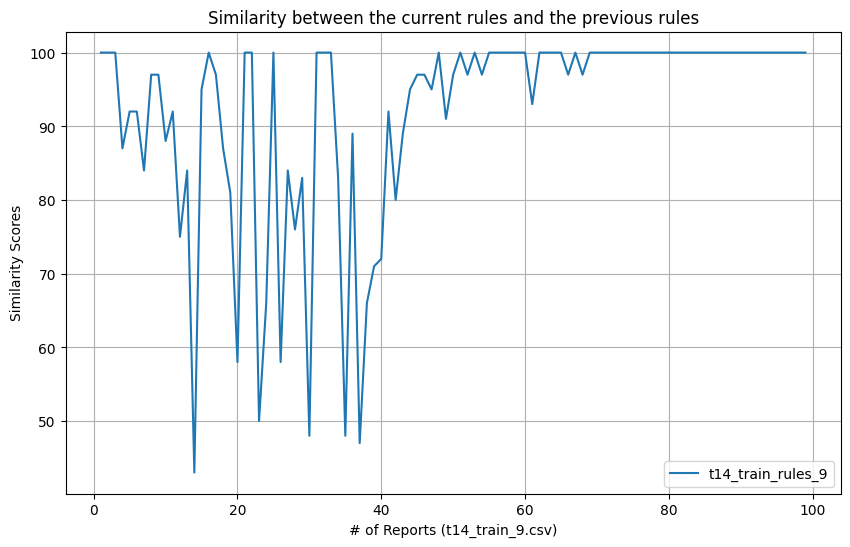

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fuzzywuzzy import fuzz

for i in range(10):
    memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_{i}.csv")
    prev_rules = ""
    similarity_scores = []
    for idx, row in memory_df.iterrows():
        if prev_rules == "":
            prev_rules = row['cmem_t_rules_str']
            similarity_scores.append(np.nan)
            continue
        similarity_scores.append(fuzz.ratio(row['cmem_t_rules_str'], prev_rules))
        prev_rules = row['cmem_t_rules_str']

    plt.figure(figsize=(10, 6))

    plt.plot(memory_df.index, similarity_scores, label=f"t14_train_rules_{i}")

    plt.xlabel(f'# of Reports (t14_train_{i}.csv)')
    plt.ylabel('Similarity Scores')
    plt.title('Similarity between the current rules and the previous rules')
    plt.legend()
    plt.grid(True)

    plt.show()

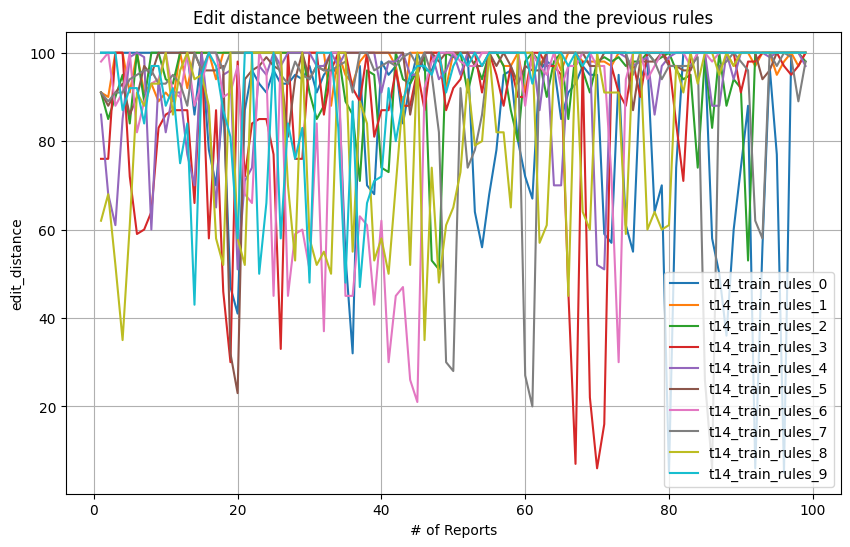

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fuzzywuzzy import fuzz


plt.figure(figsize=(10, 6))
for i in range(10):
    memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_{i}.csv")
    prev_rules = ""
    similarity_scores = []
    for idx, row in memory_df.iterrows():
        if prev_rules == "":
            prev_rules = row['cmem_t_rules_str']
            similarity_scores.append(np.nan)
            continue
        similarity_scores.append(fuzz.ratio(row['cmem_t_rules_str'], prev_rules))
        prev_rules = row['cmem_t_rules_str']

    

    plt.plot(memory_df.index, similarity_scores, label=f"t14_train_rules_{i}")

plt.xlabel(f'# of Reports')
plt.ylabel('edit_distance')
plt.title('Edit distance between the current rules and the previous rules')
plt.legend()
plt.grid(True)

plt.show()

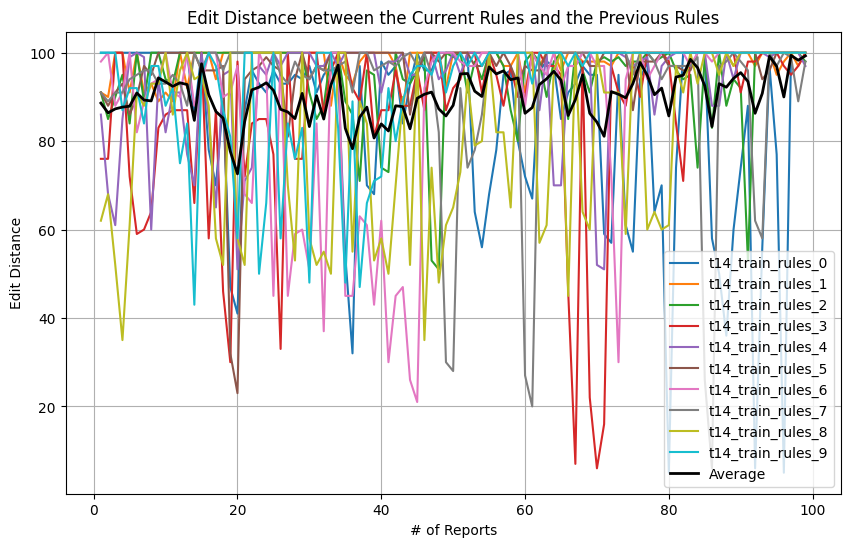

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fuzzywuzzy import fuzz

# Initialize an empty list to store all similarity scores for averaging
all_similarity_scores = []

plt.figure(figsize=(10, 6))

for i in range(10):
    memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_{i}.csv")
    prev_rules = ""
    similarity_scores = []
    
    for idx, row in memory_df.iterrows():
        if prev_rules == "":
            prev_rules = row['cmem_t_rules_str']
            similarity_scores.append(np.nan)
            continue
        similarity_scores.append(fuzz.ratio(row['cmem_t_rules_str'], prev_rules))
        prev_rules = row['cmem_t_rules_str']
    
    # Append similarity scores to all_similarity_scores
    all_similarity_scores.append(similarity_scores)
    
    # Plot individual similarity scores
    plt.plot(memory_df.index, similarity_scores, label=f"t14_train_rules_{i}")

# Convert list of lists to a DataFrame for easier manipulation
all_similarity_scores_df = pd.DataFrame(all_similarity_scores).T

# Calculate the average similarity scores
average_similarity_scores = all_similarity_scores_df.mean(axis=1)

# Plot the average similarity scores
plt.plot(memory_df.index, average_similarity_scores, label='Average', color='black', linewidth=2)

plt.xlabel('# of Reports')
plt.ylabel('Edit Distance')
plt.title('Edit Distance between the Current Rules and the Previous Rules')
plt.legend()
plt.grid(True)

plt.show()
